In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('dataset.csv')
df = data[['host_id','host_listings_count','accommodates','bathrooms','bedrooms','beds','extra_people','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','number_of_reviews','review_scores_rating','price']]
print(df.shape)
df = df.dropna()
df= df.reset_index()
print(df.shape)


(13049, 14)
(10790, 15)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df.shape)
df = df.drop(df[~df.price.str.startswith('$')].index)
print(df.shape)

(10790, 15)
(10750, 15)


In [6]:
df

,index,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,review_scores_rating,price
0,0,151977,3,1,1,1,1,$0.00,28,1125,28,28,18,94,"$4,183.00"
1,1,964081,1,2,1,1,2,$0.00,3,365,3,3,165,95,"$11,048.00"
2,2,341577,2,2,1,1,1,"$1,070.00",28,180,1,30,113,95,"$4,171.00"
3,3,1573631,3,2,1,0,1,$0.00,28,720,28,28,103,95,"$6,952.00"
4,4,341577,2,2,1,1,1,"$1,070.00",28,180,1,28,103,96,"$3,957.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10785,12889,143096922,16,9,1.5,3,5,"$1,000.00",2,1125,2,5,1,100,"$24,026.00"
10786,12916,143096922,16,7,1.5,3,4,"$1,000.00",2,1125,2,5,2,100,"$19,951.00"
10787,12932,143096922,16,7,1.5,2,4,"$1,000.00",2,1125,2,5,1,100,"$19,951.00"
10788,12991,143096922,16,6,1.5,2,3,"$1,000.00",1,1125,1,5,1,100,"$12,013.00"


In [7]:
df['price'] = df.price.str.replace('$','')
df['price'] = df.price.str.replace(",",'')
#df['price'] = df.price.str.replace('','')
df['extra_people'] = df.extra_people.str.replace('$','')
df['extra_people'] = df.extra_people.str.replace(",",'')
#df['extra_people'] = df.extra_people.str.replace('.00','')

In [8]:
df

,index,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,review_scores_rating,price
0,0,151977,3,1,1,1,1,0.00,28,1125,28,28,18,94,4183.00
1,1,964081,1,2,1,1,2,0.00,3,365,3,3,165,95,11048.00
2,2,341577,2,2,1,1,1,1070.00,28,180,1,30,113,95,4171.00
3,3,1573631,3,2,1,0,1,0.00,28,720,28,28,103,95,6952.00
4,4,341577,2,2,1,1,1,1070.00,28,180,1,28,103,96,3957.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10785,12889,143096922,16,9,1.5,3,5,1000.00,2,1125,2,5,1,100,24026.00
10786,12916,143096922,16,7,1.5,3,4,1000.00,2,1125,2,5,2,100,19951.00
10787,12932,143096922,16,7,1.5,2,4,1000.00,2,1125,2,5,1,100,19951.00
10788,12991,143096922,16,6,1.5,2,3,1000.00,1,1125,1,5,1,100,12013.00


In [9]:
df['price'].astype('float')
df['extra_people'].astype('float')
df[['host_listings_count','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights',
    'minimum_minimum_nights','maximum_minimum_nights','number_of_reviews','review_scores_rating']].astype('float')

,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,review_scores_rating
0,3.0,1.0,1.0,1.0,1.0,28.0,1125.0,28.0,28.0,18.0,94.0
1,1.0,2.0,1.0,1.0,2.0,3.0,365.0,3.0,3.0,165.0,95.0
2,2.0,2.0,1.0,1.0,1.0,28.0,180.0,1.0,30.0,113.0,95.0
3,3.0,2.0,1.0,0.0,1.0,28.0,720.0,28.0,28.0,103.0,95.0
4,2.0,2.0,1.0,1.0,1.0,28.0,180.0,1.0,28.0,103.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...
10785,16.0,9.0,1.5,3.0,5.0,2.0,1125.0,2.0,5.0,1.0,100.0
10786,16.0,7.0,1.5,3.0,4.0,2.0,1125.0,2.0,5.0,2.0,100.0
10787,16.0,7.0,1.5,2.0,4.0,2.0,1125.0,2.0,5.0,1.0,100.0
10788,16.0,6.0,1.5,2.0,3.0,1.0,1125.0,1.0,5.0,1.0,100.0


In [10]:
df.to_csv('filtereddata.csv')

In [11]:
df

,index,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,review_scores_rating,price
0,0,151977,3,1,1,1,1,0.00,28,1125,28,28,18,94,4183.00
1,1,964081,1,2,1,1,2,0.00,3,365,3,3,165,95,11048.00
2,2,341577,2,2,1,1,1,1070.00,28,180,1,30,113,95,4171.00
3,3,1573631,3,2,1,0,1,0.00,28,720,28,28,103,95,6952.00
4,4,341577,2,2,1,1,1,1070.00,28,180,1,28,103,96,3957.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10785,12889,143096922,16,9,1.5,3,5,1000.00,2,1125,2,5,1,100,24026.00
10786,12916,143096922,16,7,1.5,3,4,1000.00,2,1125,2,5,2,100,19951.00
10787,12932,143096922,16,7,1.5,2,4,1000.00,2,1125,2,5,1,100,19951.00
10788,12991,143096922,16,6,1.5,2,3,1000.00,1,1125,1,5,1,100,12013.00


In [12]:
traindata, testdata = train_test_split(df, test_size=0.3, random_state=0)

In [13]:
print(traindata)

      index    host_id  ... review_scores_rating     price
4415   4631   20384361  ...                   91   5027.00
9459  10324   17228309  ...                   95   7508.00
5654   5933  210081038  ...                   95  14480.00
2572   2668  155715012  ...                   93  39043.00
9988  11007  315976476  ...                   96  49984.00
...     ...        ...  ...                  ...       ...
9259  10067  304825049  ...                   89  99967.00
4877   5107  161069792  ...                   96  12979.00
3277   3436   53905021  ...                   96   3316.00
9882  10871  204881897  ...                   90   5990.00
2741   2848   95824703  ...                  100   7508.00

[7525 rows x 15 columns]


In [14]:
print(testdata)

       index    host_id  ... review_scores_rating      price
2835    2946  187571355  ...                   95   13049.00
8270    8902  203203154  ...                   93    6436.00
4102    4297  213271329  ...                   96   12013.00
9878   10865  204881897  ...                  100    5990.00
9471   10340  274793900  ...                   98   14974.00
...      ...        ...  ...                  ...        ...
6318    6661  248947076  ...                   92   11477.00
1655    1688  131115046  ...                   98    3969.00
10422  11730  245678060  ...                  100   49984.00
7841    8382  275887146  ...                   97  100005.00
6236    6572  247720907  ...                   95   30033.00

[3225 rows x 15 columns]


In [15]:
traindata.to_csv('train.csv')
testdata.to_csv('test.csv')

In [16]:
x_train = traindata[['host_id','host_listings_count','accommodates','bathrooms','bedrooms','beds','extra_people','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','number_of_reviews']]
y_train = traindata[['review_scores_rating','price']]
y_train_price = traindata[['price']]
y_train_rate = traindata[['review_scores_rating']]

x_test = testdata[['host_id','host_listings_count','accommodates','bathrooms','bedrooms','beds','extra_people','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','number_of_reviews']]
y_test = testdata[['review_scores_rating','price']]
y_test_price = testdata[['price']]
y_test_rate = testdata[['review_scores_rating']]

scaler=MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print(x_train['accommodates'].shape)
print(x_train['bedrooms'].shape)
print(x_train['bathrooms'].shape)
print(x_train['beds'].shape)
print(x_train['extra_people'].shape)
print(x_train['host_id'].shape)
print(x_train['host_listings_count'].shape)
print(x_train['minimum_nights'].shape)
print(x_train['minimum_minimum_nights'].shape)
print(x_train['maximum_minimum_nights'].shape)
print(x_train['maximum_nights'].shape)
print(x_train['number_of_reviews'].shape)





(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)
(7525,)


2

In [17]:
from sklearn.feature_selection import RFE

In [18]:
model1 = LogisticRegression()
model2 = LogisticRegression()
rfe = RFE(model1, 4)
fit = rfe.fit(x_train, y_train_price)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

In [19]:
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [ True False False False False False  True False  True False False  True]
Feature Ranking: [1 2 6 9 8 7 1 4 1 5 3 1]


In [20]:
#using the recommended feature
x_train_logistic = x_train[['host_id','extra_people','maximum_nights','number_of_reviews']]
x_test_logistic = x_test[['host_id','extra_people','maximum_nights','number_of_reviews']]

model1 = model1.fit(x_train_logistic,y_train_price)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
#using all feature
model2 = model2.fit(x_train,y_train_price)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from sklearn import metrics
y_predict1=model1.predict(x_test_logistic)
acc1=model1.score(x_test_logistic, y_test_price)
print("Accuracy of Model :{}".format(acc1))
print('MAE :{}'.format(metrics.mean_absolute_error(y_test_price, y_predict1)))
print('MSE :{}'.format(metrics.mean_squared_error(y_test_price, y_predict1)))
print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test_price, y_predict1))))


acc2=model2.score(x_test, y_test_price)
y_predict2=model2.predict(x_test)
print("Accuracy of Model :{}".format(acc2))
print('MAE :{}'.format(metrics.mean_absolute_error(y_test_price, y_predict2)))
print('MSE :{}'.format(metrics.mean_squared_error(y_test_price, y_predict2)))
print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test_price, y_predict2))))


Accuracy of Model :0.03658914728682171
MAE :43380.93519379845
MSE :7603355371.653334
RMSE :87197.2211234586
Accuracy of Model :0.03658914728682171
MAE :43380.93519379845
MSE :7603355371.653334
RMSE :87197.2211234586


Feature engineering dan feature selection sangat mempengaruhi data, karena hanya data tertentu yang dapat di baca pada logistic regression sehingga jika feature tersebut tidak di ubah menjadi data yang dapat dibaca oleh logistic regression akan mencegah logistic regression untuk berjalan. Kita juga bisa melihat, dengan feature selection kita dapat mempercepat waktu pembelajaran mesin jika dengan 4 data (model1) dapat menghasilkan acc yang sama dengan 12 data (model2)maka lebih baik menggunakan 4 data, Tapi 4 data juga memiliki kekurangan antara lain Waktu untuk memprosess 4 data apa saja yang dipilih dengan recursive feature elimination (RFE) memakan waktu running yang cukup lama

Dengan menggunakan 'host_id','extra_people','maximum_nights','number_of_reviews' kita dapat memprediksi harga dan juga dengan menggunakan model.score dan membandingan x_test dan y_test_price maka kita akan membandingkan accuracy jawban yang kita prediksi dan jawaban sebenarnya
kemudian juga dapat di lihat dengan mean absolute error, mean squared error dan juga dengan Root mean squared error.

Ref https://realpython.com/logistic-regression-python/

3

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stdscaler = scaler.transform(x_train)
x_test_stdscaler = scaler.transform(x_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
classifier = KNeighborsClassifier(n_neighbors=5)
pca = PCA(n_components=2)
pca1 = pca.fit(x_train_stdscaler)
x_train_knn = pca1.transform(x_train_stdscaler)
pca2 = pca.fit(x_test_stdscaler)
x_test_knn = pca2.transform(x_test_stdscaler)

classifier.fit(x_train_knn, y_train_rate)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred_rate = classifier.predict(x_test_knn)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_rate, y_pred_rate))
print('MAE :{}'.format(metrics.mean_absolute_error(y_test_price, y_pred_rate)))
print('MSE :{}'.format(metrics.mean_squared_error(y_test_price, y_pred_rate)))
print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test_price, y_pred_rate))))


              precision    recall  f1-score   support

         100       0.17      0.63      0.27       515
          20       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         7
          50       0.00      0.00      0.00         3
          53       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1
          60       0.00      0.00      0.00        17
          63       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          66       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         3
          68       0.00      0.00      0.00         2
          69       0.00      0.00      0.00         3
          70       0.00      0.00      0.00        17
          71       0.00      0.00      0.00         4
          72       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature engineering dan feature selection sangat mempengaruhi data, karena pada nearest neighbor classification  sangat di perlukan untuk menghitung jarak dan sebagainya, selain itu semakin dikit jumlah feature maka akan membuat KNN semakin cepat. Karena itu digunakanlah PCA dan dengan StandardScaler untuk normalisasi data.

Dengan menggunakan host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,price kita dapat memprediksi berapakah review yang kakan di berikan.

Seperti yang dapat di lihat jika dibandingkan dengan yang lain, karena pada classification menggunakan klasifikasi dan di karenakan review yang memiliki range dari 0-100, maka akan kurang efektif jika di bandingkan dengan metode lainnya.

ref https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

4

In [27]:
from sklearn import svm

In [28]:
#Create a svm Classifier
svmclf = svm.SVC(kernel='linear') # Linear Kernel


In [29]:
#Train the model using the training sets
svmclf.fit(x_train_scaled, y_train_rate)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred_svm = svmclf.predict(x_test_scaled)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test_rate, y_pred_svm))
print('MAE :{}'.format(metrics.mean_absolute_error(y_test_rate, y_pred_svm)))
print('MSE :{}'.format(metrics.mean_squared_error(y_test_rate, y_pred_svm)))
print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test_rate, y_pred_svm))))

Accuracy: 0.19348837209302325
MAE :6.448372093023256
MSE :102.99906976744187
RMSE :10.148845735719991


Feature engineering dan feature selection sangat mempengaruhi data, tapi pada SVM feature selection dapat membuat data menjadi semakin buruk. Selain itu karena SVM memiliiki feature untuk mencegah overfiitting, yang menyebabkan SVM dapat bekerja dengan baik meski tidak feature selection. 

Dengan menggunakan host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,price kita dapat memprediksi berapakah review yang akan di berikan.

Seperti yang dapat di lihat jika dibandingkan dengan yang lain, karena pada SVM menggunakan klasifikasi dan di karenakan review yang memiliki range dari 0-100, maka akan kurang effektif tapi jika dibandingkan dengan nearest-neighbor classification, lebih effektif seperti yang kita bsa lihat, accuracy yang di dapat berbeda 7%

ref: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python#building

5

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clftree= DecisionTreeClassifier()
clftree.fit(x_train, y_train_rate)
y_pred_tree = clftree.predict(x_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test_rate, y_pred_tree))
print('MAE :{}'.format(metrics.mean_absolute_error(y_test_rate, y_pred_tree)))
print('MSE :{}'.format(metrics.mean_squared_error(y_test_rate, y_pred_tree)))
print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test_rate, y_pred_tree))))

Accuracy: 0.1724031007751938
MAE :6.087441860465116
MSE :97.59751937984497
RMSE :9.879145680667179


Feature engineering dan feature selection sangat mempengaruhi data, karena pada decision tree data bisa sangat beragam dan dapat menghasilan tree yang besar, karena ini data yang masuk harus di filter terlebih dahulu agar dapat menghasilkan tree yang lebih compact dan lebih cepat di process.

Dengan menggunakan host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,price kita dapat memprediksi berapakah review yang akan di berikan.

Seperti yang dapat di lihat descicion tree tidak terlalu effektif, jika dibandingkan dengan SVM, tapi jika dengan nearest-neighbor classification, bisa kita lihat, Decision tree memiliki hasil yang lebih baik.

Ref : https://www.datacamp.com/community/tutorials/decision-tree-classification-python

6

In [35]:
from sklearn.mixture import GaussianMixture

In [43]:
pca = PCA(n_components=2)
pca1 = pca.fit(x_train_scaled)
x_train_pca = pca1.transform(x_train_scaled)
pca2 = pca.fit(x_test_scaled)
x_test_pca = pca2.transform(x_test_scaled)

gmm = GaussianMixture(n_components=12)
gmm.fit(x_train_pca)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=12, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

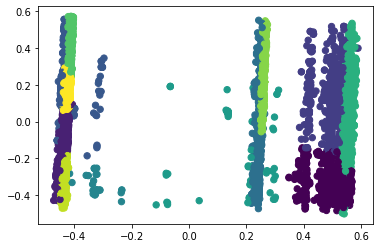

In [44]:
labels = gmm.predict(x_train_pca)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, s=40, cmap='viridis')

Gaussian mixture model merupakan sebuah probabilistic model yang mengasumsi semua data potint di buat dari gabungan dari bbrp gaussian distribusi dengan parameter tertentu

ref : https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [38]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters = 12)
kmeans.fit(x_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
print(kmeans.cluster_centers_)

[[-0.42751083 -0.05945874]
 [ 0.51573652 -0.10012899]
 [ 0.25253932  0.17652724]
 [-0.41357375  0.41745854]
 [ 0.50019399 -0.34591293]
 [-0.43405873 -0.31454062]
 [-0.41946645  0.18925502]
 [ 0.53374383  0.33550139]
 [ 0.26058712  0.37489459]
 [ 0.23591952 -0.31503377]
 [ 0.24574392 -0.03211519]
 [ 0.52493937  0.13143494]]


In [47]:
lab = kmeans.labels_

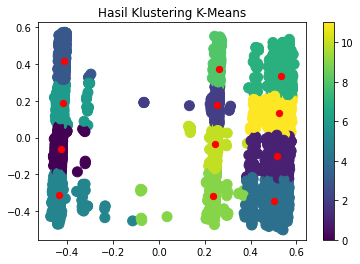

In [49]:
output = plt.scatter(x_train_pca[:,0], x_train_pca[:,1], s = 100, c = lab, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

Kmeans merupakan kategori pengelompokan berbasis center yang dimana titik center tersebut merupkan titik di tengah pusat cluster data. 

ref : https://medium.com/@fauziyahdewi16/k-means-clustering-with-scikit-learn-in-python-b8e7835d9753